In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model

from planer_utils import plot_decision_boundary, sigmoid, load_extra_datasets, load_planar_dataset
%matplotlib inline

np.random.seed(1)

## Import Dataset

In [3]:
X, Y = load_planar_dataset()

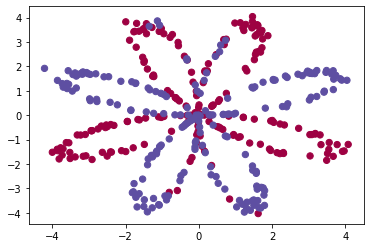

In [4]:
# Visualize the dataset

plt.scatter(X[0, :],X[1, :], c=np.reshape(Y,-1), s=40 ,cmap=plt.cm.Spectral)

In [5]:
# Start code here

shape_X = X.shape
shape_Y = Y.shape

m = Y.shape[1]

print(shape_X)
print(shape_Y)
print('I have m = %d training example'  % (m))

(2, 400)
(1, 400)
I have m = 400 training example


## Simple Logistic Regression

In [6]:
# Train the logistic regression classifier

clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T , Y.T)

C:\Users\ATUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ATUL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic Regression : 47% correctly predicted datapoints


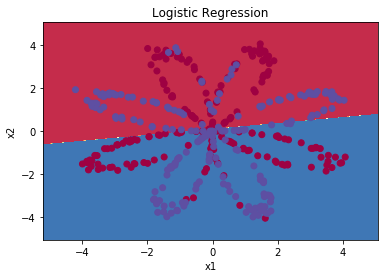

In [7]:
# Plot the decision boundary for logistic regression

plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic Regression')

# print accuracy

LR_predictions = clf.predict(X.T)
print('Accuracy of logistic Regression : %d' % float((np.dot(Y,LR_predictions)
                                                     + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100) + '%' 
                                                       + ' correctly predicted datapoints')

#### The dataset is non-linearly seperable , so logistic regression is not performing well , so we use try neural network,hope its work better..

## Neural Network

### Remainder : The general methodology to build Neural Network

1. Define the neural network structure ( input units , hidden units , output units etc.)
 
2. Initialize the model's  parameter
 
3. Loop:
       -  Implement forward propogation
       -  Compute loss
       -  Implement backward propagation to get the gradients
       -  Update parameters (gradient descent)


### we often build helper functions to compute steps 1-3 , and merge them all in a nn_model(). and then learnt right parameters,and then we pass new data in this model for making predictions.

Define three Variables

> n_x : the size of the input layer

> n_h : the size of the hidden layer

> n_y : the size of the output layer

In [8]:
# GRADED FUNCTIONS

def layer_sizes(X, Y):
    
    n_x = X.shape[0] # shape of input layer
    n_h = 4          # shape of hidden layer
    n_y = Y.shape[0] # shape of output layer
    
    return (n_x, n_h, n_y)
    
    

In [9]:
#X_assess, Y_assess = layer_sizes_test_case(X,Y)
(n_x, n_h, n_y) = layer_sizes(X, Y)
print('the size of input layers: '  ,n_x)
print('the size of hidden layers: ' ,n_h)
print('the size of output layers: ' ,n_y)

the size of input layers:  2
the size of hidden layers:  4
the size of output layers:  1


Initialize the parameters

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {'W1': W1,'b1': b1,'W2': W2,'b2': b2}
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))


    
    return parameters


In [11]:
# test of initialization of parameters

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [12]:
def forward_propogation(X, parameters):
    
    # retrieve parameters from the dictionary 'parameters'
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Implement forward propogation to calculate A2(probabilities)
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert (A2.shape == (1, X.shape[1]))
    
    cache = {'Z1' : Z1,
             'A1' : A1,
             'Z2' : Z2,
             'A2' : A2}
    
    return A2, cache
    
    

In [14]:
# test case of forward propogation

A2, cache = forward_propogation(X, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.00033027391093081744 0.00032973695550608996 -4.3569257945136905e-05 0.49998910768597105


In [15]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example
    
    # Retrieve W1 and W2 from parameters
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # compute the cross-entropy cost
     
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    
    cost = -(np.sum(logprobs))/m
    
    cost = np.squeeze(cost)
    
    assert(isinstance(cost, float))
    
    return cost
    

In [16]:
#A2, Y, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6930480201239823


In [17]:
def backward_propogation(parameters, cache, X, Y):
    
    m = X.shape[1]  # number of example
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Retrieve also A1 and A2 from dictionary "cache".
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    # backward propogation: calculate dW1, db1 , dW2 , db2
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1 ,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2) , 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW1' : dW1,
             'dW2' : dW2,
             'db1' : db1,
             'db2' : db2}
    
    return grads
    

In [19]:
#parameters, cache, X, Y = backward_propagation_test_case()

grads = backward_propogation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00023606 -0.00207914]
 [ 0.0002091  -0.00178201]
 [-0.00012051  0.0010843 ]
 [-0.00051496  0.00449162]]
db1 = [[ 1.06848030e-07]
 [-9.70907252e-07]
 [-7.20012658e-08]
 [ 3.03048452e-07]]
dW2 = [[-1.75478714e-05  3.70240274e-03 -1.25686736e-03 -2.55725650e-03]]
db2 = [[-1.0892314e-05]]


In [26]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # update the each parameter
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1': W1 ,
                  'b1': b1 ,
                  'W2': W2 ,
                  'b2': b2 }
    
    return parameters
    
    
    

In [28]:
#parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00474592  0.00453122]
 [-0.02187425  0.02076862]
 [-0.01763911 -0.01107402]
 [ 0.00629046 -0.02345735]]
b1 = [[-2.61777674e-07]
 [ 2.37872277e-06]
 [ 1.76403101e-07]
 [-7.42468707e-07]]
W2 = [[-0.01053653 -0.01816096  0.00859387  0.02918736]]
b2 = [[2.66861694e-05]]


In [31]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False ):
    
    np.random.seed(3)
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y".
     #Outputs = "W1, b1, W2, b2, parameters". 
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)   
    
    for i in range(0, num_iterations):
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        
        A2 , cache = forward_propogation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        
        cost = compute_cost(A2, Y, parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        
        grads = backward_propogation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        
        if print_cost and i %1000 == 0:
            print('Cost after  iterations %i: %f' % (i,cost))
            
    return parameters
        

In [32]:
#X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[  0.14445957  -9.68511821]
 [-11.13258056   3.33889464]
 [-11.46576847 -13.41880289]
 [  9.25557561 -10.19782999]]
b1 = [[ 0.01582779]
 [-0.40866688]
 [-0.0649459 ]
 [ 0.01699806]]
W2 = [[-11.98570366   3.44424232   6.15141676  10.5213605 ]]
b2 = [[-0.06602685]]


In [33]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propogation(X, parameters)
    
    predictions = np.round(A2)
    
    return predictions
    

In [34]:
#parameters, X_assess = predict_test_case()

predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.4875


# Build a model with a n_h-dimensional hidden layer

Cost after  iterations 0: 0.693048
Cost after  iterations 1000: 0.288083
Cost after  iterations 2000: 0.254385
Cost after  iterations 3000: 0.233864
Cost after  iterations 4000: 0.226792
Cost after  iterations 5000: 0.222644
Cost after  iterations 6000: 0.219731
Cost after  iterations 7000: 0.217504
Cost after  iterations 8000: 0.219471
Cost after  iterations 9000: 0.218562
Cost after  iterations 10000: 0.217822


Text(0.5, 1.0, 'Decision Boundary for hidden layer size4')

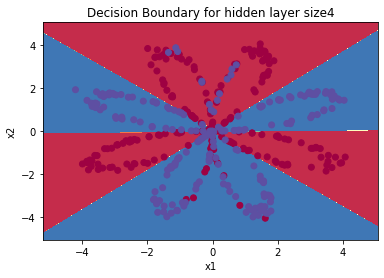

In [49]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10001, print_cost=True )

# Plot the decision boundary

plot_decision_boundary(lambda x : predict(parameters, x.T),X, Y)
predictions = predict(parameters, X)

plt.title('Decision Boundary for hidden layer size' + str(4))


In [38]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 7 hidden units: 91.25 %


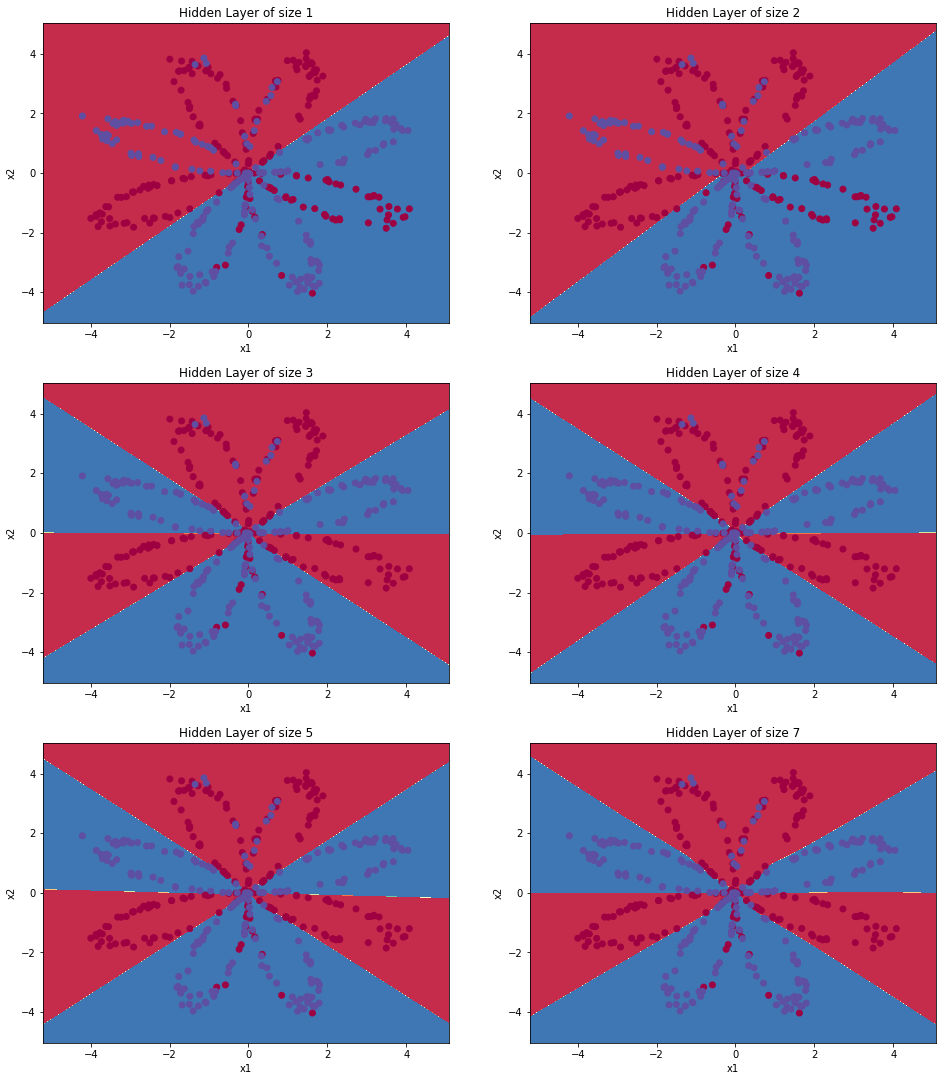

In [39]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 7]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))